In [1]:
!pip install -U openpyxl

In [1]:
import pandas as pd

url = "https://github.com/laxmimerit/All-CSV-ML-Data-Files-Download/raw/master/fake_news.xlsx"
df = pd.read_excel(url, engine="openpyxl")


In [2]:
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20757 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [4]:
df.isnull().sum()

,0
id,0
title,558
author,1957
text,43
label,0


In [5]:
df = df.dropna()
df.isnull().sum()

,0
id,0
title,0
author,0
text,0
label,0


In [6]:
print(df.shape)
df['label'].value_counts()
# 0 => Real News
# 1 => Fake News

(18281, 5)


,count
label,
0,10361
1,7920


## Data Analysis

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Distribution of Labels')

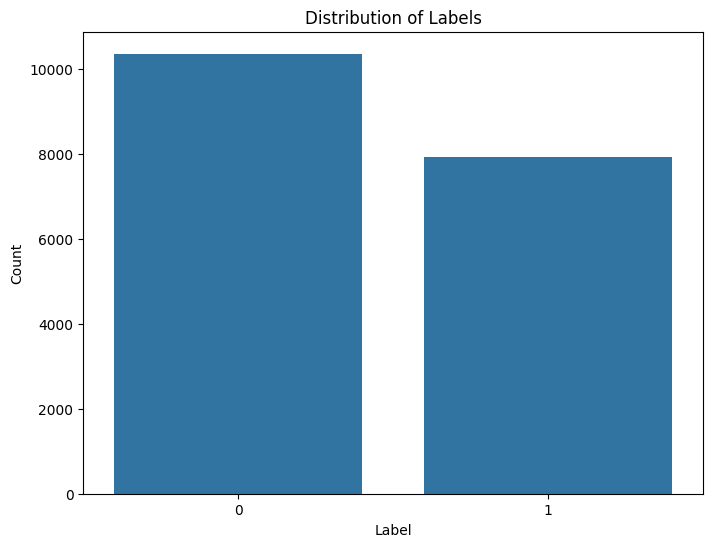

In [8]:
label_counts = df['label'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')

In [9]:
# 1.5 tokens per word on average
df["title_tokens"] = df["title"].apply(lambda x: len(x.split())*1.5)
df["text_tokens"] = df["text"].apply(lambda x: len(x.split())*1.5)
df

<ipython-input-9-a3f53226bc97>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["title_tokens"] = df["title"].apply(lambda x: len(x.split())*1.5)
<ipython-input-9-a3f53226bc97>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["text_tokens"] = df["text"].apply(lambda x: len(x.split())*1.5)


,id,title,author,text,label,title_tokens,text_tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,21.0,1230.0
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,13.5,1065.0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,10.5,1899.0
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15.0,835.5
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,21.0,231.0
...,...,...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0,13.5,460.5
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0,16.5,1680.0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0,22.5,1201.5
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1,12.0,400.5


<Axes: xlabel='text_tokens', ylabel='Count'>

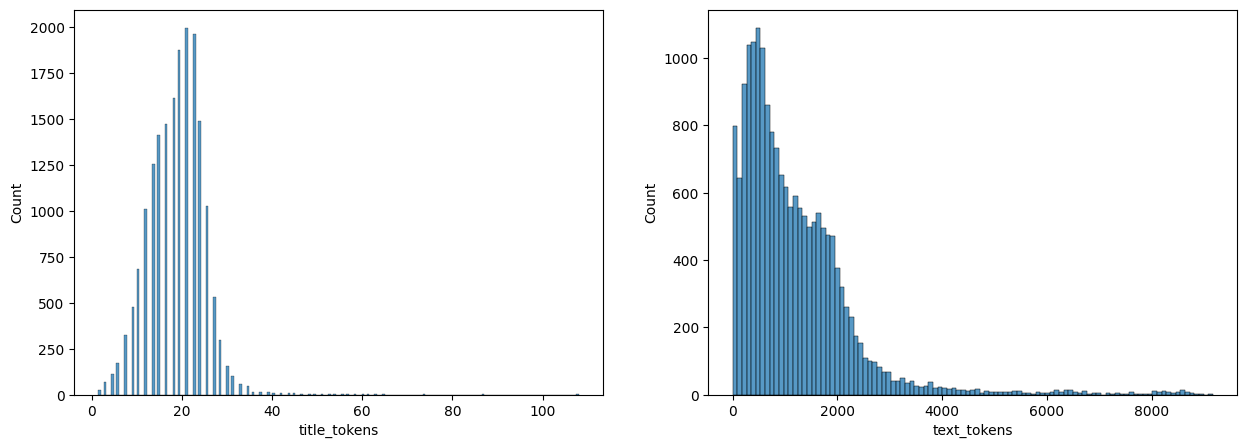

In [10]:
fig, axis = plt.subplots(1,2, figsize=(15,5))
sns.histplot(df["title_tokens"], ax=axis[0])
sns.histplot(df["text_tokens"], ax=axis[1])

## Data Loader and Train Test Split

In [11]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df, test_size=0.3, random_state=42, stratify=df["label"])
test,validation = train_test_split(test, test_size=1/3, random_state=42, stratify=test["label"])
train.shape,test.shape,validation.shape,df.shape

((12796, 7), (3656, 7), (1829, 7), (18281, 7))

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12796 entries, 20451 to 633
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            12796 non-null  int64  
 1   title         12796 non-null  object 
 2   author        12796 non-null  object 
 3   text          12796 non-null  object 
 4   label         12796 non-null  int64  
 5   title_tokens  12796 non-null  float64
 6   text_tokens   12796 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 799.8+ KB


In [13]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 16.8 MB/s eta 0:00:00


In [14]:
from datasets import Dataset, DatasetDict

dataset = DatasetDict({
    "train": Dataset.from_pandas(train,preserve_index=False),
    "test": Dataset.from_pandas(test,preserve_index=False),
    "validation": Dataset.from_pandas(validation,preserve_index=False)
})
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'author', 'text', 'label', 'title_tokens', 'text_tokens'],
        num_rows: 12796
    })
    test: Dataset({
        features: ['id', 'title', 'author', 'text', 'label', 'title_tokens', 'text_tokens'],
        num_rows: 3656
    })
    validation: Dataset({
        features: ['id', 'title', 'author', 'text', 'label', 'title_tokens', 'text_tokens'],
        num_rows: 1829
    })
})

## Data Tokenization

In [15]:
from transformers import AutoTokenizer

text = "Machine learning is game changer! Thanks to Krish Naik."

model_ckpt = "distilbert-base-uncased"
distilbert_tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
distilbert_tokens = distilbert_tokenizer.tokenize(text)

model_ckpt = "google/mobilebert-uncased"
mobilebert_tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
tinybert_tokens = mobilebert_tokenizer.tokenize(text)

model_ckpt = "huawei-noah/TinyBERT_General_4L_312D"
tinybert_tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
tinybert_tokens = tinybert_tokenizer.tokenize(text)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/847 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/409 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [16]:
distilbert_tokenizer, mobilebert_tokenizer, tinybert_tokenizer

(DistilBertTokenizerFast(name_or_path='distilbert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
 	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
 	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
 	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
 	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
 	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
 }
 ),
 MobileBertTokenizerFast(name_or_path='google/mobilebert-uncased', vocab_size=30522, model_max_length=100

In [17]:
def tokenize(batch):
  temp = distilbert_tokenizer(batch["title"], padding=True, truncation=True)
  return temp

print(tokenize(dataset["train"][:2]))

{'input_ids': [[101, 6221, 8398, 22577, 4769, 28667, 9331, 102], [101, 2006, 1996, 2769, 4446, 102, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 0, 0]]}


In [18]:
encoded_dataset = dataset.map(tokenize, batched=True, batch_size=None)
encoded_dataset

Map:   0%|          | 0/12796 [00:00<?, ? examples/s]

Map:   0%|          | 0/3656 [00:00<?, ? examples/s]

Map:   0%|          | 0/1829 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'author', 'text', 'label', 'title_tokens', 'text_tokens', 'input_ids', 'attention_mask'],
        num_rows: 12796
    })
    test: Dataset({
        features: ['id', 'title', 'author', 'text', 'label', 'title_tokens', 'text_tokens', 'input_ids', 'attention_mask'],
        num_rows: 3656
    })
    validation: Dataset({
        features: ['id', 'title', 'author', 'text', 'label', 'title_tokens', 'text_tokens', 'input_ids', 'attention_mask'],
        num_rows: 1829
    })
})

## Model Building

In [21]:
from transformers import AutoModelForSequenceClassification, AutoConfig
import torch

label2id = {"Real": 0, "Fake": 1}
id2label = {0: "Real", 1:"Fake"}
model_ckpt = "distilbert-base-uncased"

num_labels = len(label2id)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
config = AutoConfig.from_pretrained(model_ckpt, num_labels=num_labels, label2id=label2id, id2label=id2label)
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, config=config).to(device)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [22]:
model.config.id2label

{0: 'Real', 1: 'Fake'}

## Evaluator

In [23]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.5 MB/s eta 0:00:00


In [24]:
import evaluate
import numpy as np

accuracy = evaluate.load("accuracy")

def compute_metrics(eval_pred):
  predictions, labels = eval_pred
  predictions = np.argmax(predictions, axis=1)
  return accuracy.compute(predictions=predictions, references=labels)

In [29]:
import os
os.environ["WANDB_DISABLED"] = "true"

In [30]:
from transformers import TrainingArguments

batch_size = 32
training_dir = "train"

training_args = TrainingArguments(
    output_dir=training_dir,
    overwrite_output_dir=True,
    learning_rate=2e-4,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=2,
    weight_decay=0.01,
    evaluation_strategy='epoch',
    disable_tqdm=False)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [31]:
from transformers import Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=encoded_dataset["train"],
    eval_dataset=encoded_dataset["validation"],
    tokenizer=distilbert_tokenizer,
    compute_metrics=compute_metrics
)

<ipython-input-31-e75af123cfd9>:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [32]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.164052,0.950246
2,0.195700,0.112930,0.962274


TrainOutput(global_step=800, training_loss=0.15997172594070436, metrics={'train_runtime': 224.5672, 'train_samples_per_second': 113.961, 'train_steps_per_second': 3.562, 'total_flos': 635644812450816.0, 'train_loss': 0.15997172594070436, 'epoch': 2.0})

## Evaluation

In [33]:
preds_output = trainer.predict(encoded_dataset["test"])

In [34]:
preds_output.metrics

{'test_loss': 0.11095582693815231,
 'test_accuracy': 0.9595185995623632,
 'test_runtime': 8.2604,
 'test_samples_per_second': 442.593,
 'test_steps_per_second': 13.922}

In [35]:
y_pred = np.argmax(preds_output.predictions,axis=1)
y_true = encoded_dataset['test'][:]['label']

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=list(label2id)))

              precision    recall  f1-score   support

        Real       0.98      0.95      0.96      2072
        Fake       0.94      0.97      0.95      1584

    accuracy                           0.96      3656
   macro avg       0.96      0.96      0.96      3656
weighted avg       0.96      0.96      0.96      3656



## Benchmarking

In [ ]:
# use sklearn to build compute metrics
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [39]:
model_dict = {
    "bert-base":"bert-base-uncased",
    "distilbert":"distilbert-base-uncased",
    "tinybert":"huawei-noah/TinyBERT_General_4L_312D",
    "mobilebert":"google/mobilebert-uncased"

    }
def train_model(model_name):
  model_ckpt = model_dict[model_name]
  tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
  config = AutoConfig.from_pretrained(model_ckpt, num_labels=num_labels, label2id=label2id, id2label=id2label)
  model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, config=config).to(device)

  def local_tokenize(batch):
    temp = tokenizer(batch["title"], padding=True, truncation=True)
    return temp

  encoded_dataset = dataset.map(local_tokenize, batched=True, batch_size=None)

  trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=encoded_dataset["train"],
    eval_dataset=encoded_dataset["validation"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
  )
  trainer.train()
  preds = trainer.predict(encoded_dataset["test"])
  return preds.metrics
import time
model_performance = {}
for model_name in model_dict:
  print(f"Training {model_name}")
  start = time.time()
  result = train_model(model_name)
  end = time.time()
  model_performance[model_name] = {model_name:result,"Time Taken": end-start}

Training bert-base


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/12796 [00:00<?, ? examples/s]

Map:   0%|          | 0/3656 [00:00<?, ? examples/s]

Map:   0%|          | 0/1829 [00:00<?, ? examples/s]

<ipython-input-39-eaa2409f6501>:20: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.198190,0.952433
2,0.215400,0.119959,0.962274


Training distilbert


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/12796 [00:00<?, ? examples/s]

Map:   0%|          | 0/3656 [00:00<?, ? examples/s]

Map:   0%|          | 0/1829 [00:00<?, ? examples/s]

<ipython-input-39-eaa2409f6501>:20: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.125458,0.950246
2,0.155500,0.129994,0.958447


Training tinybert


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at huawei-noah/TinyBERT_General_4L_312D and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/12796 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/3656 [00:00<?, ? examples/s]

Map:   0%|          | 0/1829 [00:00<?, ? examples/s]

<ipython-input-39-eaa2409f6501>:20: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.125348,0.947512
2,0.192600,0.134526,0.956807


Training mobilebert


Some weights of MobileBertForSequenceClassification were not initialized from the model checkpoint at google/mobilebert-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/12796 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/3656 [00:00<?, ? examples/s]

Map:   0%|          | 0/1829 [00:00<?, ? examples/s]

<ipython-input-39-eaa2409f6501>:20: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.129562,0.954073
2,7152.900500,0.118883,0.960634


In [40]:
model_performance

{'bert-base': {'bert-base': {'test_loss': 0.1267310231924057,
   'test_accuracy': 0.9554157549234136,
   'test_runtime': 15.1992,
   'test_samples_per_second': 240.54,
   'test_steps_per_second': 7.566},
  'Time Taken': 457.5376012325287},
 'distilbert': {'distilbert': {'test_loss': 0.11034060269594193,
   'test_accuracy': 0.962800875273523,
   'test_runtime': 7.4466,
   'test_samples_per_second': 490.961,
   'test_steps_per_second': 15.443},
  'Time Taken': 237.2642924785614},
 'tinybert': {'tinybert': {'test_loss': 0.13364627957344055,
   'test_accuracy': 0.9589715536105032,
   'test_runtime': 1.9905,
   'test_samples_per_second': 1836.753,
   'test_steps_per_second': 57.775},
  'Time Taken': 48.08888649940491},
 'mobilebert': {'mobilebert': {'test_loss': 0.10891037434339523,
   'test_accuracy': 0.9652625820568927,
   'test_runtime': 6.4018,
   'test_samples_per_second': 571.089,
   'test_steps_per_second': 17.964},
  'Time Taken': 202.37071871757507}}

## Model Load and Save

In [41]:
trainer.save_model("fake_news")

In [42]:
from transformers import pipeline
classifier = pipeline("text-classification", model="fake_news")

Device set to use cuda:0


In [43]:
classifier("some text data")

[{'label': 'Fake', 'score': 0.990070641040802}]

In [44]:
!zip -r fake_news.zip fake_news


  adding: fake_news/ (stored 0%)
  adding: fake_news/training_args.bin (deflated 51%)
  adding: fake_news/model.safetensors (deflated 8%)
  adding: fake_news/tokenizer_config.json (deflated 75%)
  adding: fake_news/config.json (deflated 47%)
  adding: fake_news/special_tokens_map.json (deflated 42%)
  adding: fake_news/tokenizer.json (deflated 71%)
  adding: fake_news/vocab.txt (deflated 53%)
